In [29]:
import pandas as pd
from datetime import datetime

# Define the CSV file name
csv_file = "expenses.csv"

# Function to add expense
def add_expense():
    date = input("Enter date (YYYY-MM-DD) or leave blank for today: ")
    if not date:
        date = datetime.today().strftime('%Y-%m-%d')

    category = input("Enter category (e.g., Food, Transport, Shopping): ")
    amount = float(input("Enter amount spent: "))
    note = input("Any notes? (optional): ")

    # Create a DataFrame
    new_entry = pd.DataFrame([{
        "Date": date,
        "Category": category,
        "Amount": amount,


    }])

    # Append to CSV (create if doesn't exist)
    try:
        existing_data = pd.read_csv(csv_file)
        updated_data = pd.concat([existing_data, new_entry], ignore_index=True)
    except FileNotFoundError:
        updated_data = new_entry

    updated_data.to_csv(csv_file, index=False)
    print("✅ Expense saved successfully!")

# Run the function
add_expense()


Enter date (YYYY-MM-DD) or leave blank for today: 2025-07-19
Enter category (e.g., Food, Transport, Shopping): Shopping
Enter amount spent: 3000
Any notes? (optional): 
✅ Expense saved successfully!


In [30]:
# Read the expense data
df = pd.read_csv("expenses.csv")

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Show basic stats
print("📅 Total Records:", len(df))
print("💰 Total Spent: Rs.", df["Amount"].sum())

# Category-wise spending
category_summary = df.groupby("Category")["Amount"].sum().sort_values(ascending=False)
print("\n📂 Spending by Category:\n", category_summary)

# Monthly spending trend
df["Month"] = df["Date"].dt.to_period("M")
monthly_summary = df.groupby("Month")["Amount"].sum()
print("\n📈 Monthly Spending Trend:\n", monthly_summary)





📅 Total Records: 24
💰 Total Spent: Rs. 37480.0

📂 Spending by Category:
 Category
Shopping     17500.0
Food         13770.0
Transport     6210.0
Name: Amount, dtype: float64

📈 Monthly Spending Trend:
 Month
2025-06    26280.0
2025-07    11200.0
Freq: M, Name: Amount, dtype: float64


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns



/tmp/ipython-input-2260947342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='viridis')


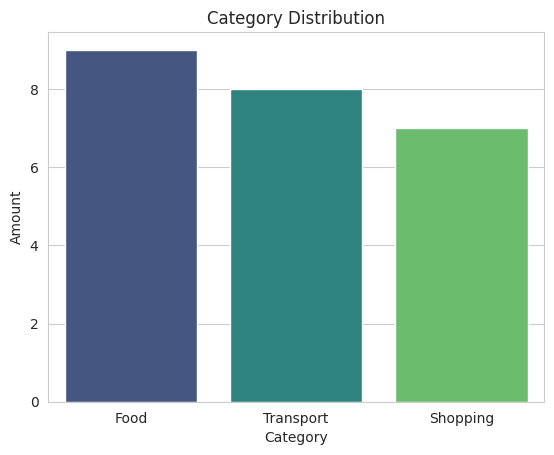

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Category', data=df, palette='viridis')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()

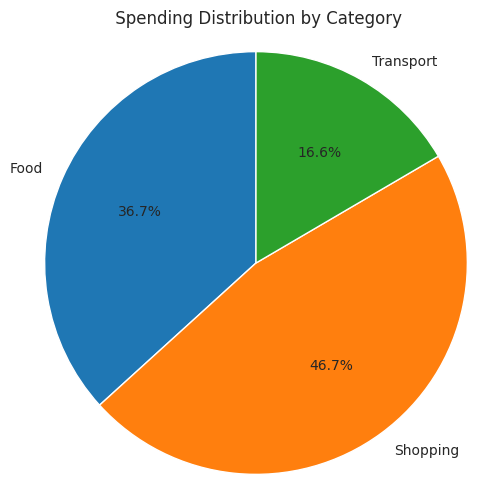

In [34]:
# Group by Category
category_data = df.groupby("Category")["Amount"].sum()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(category_data, labels=category_data.index, autopct='%1.1f%%', startangle=90)
plt.title(" Spending Distribution by Category")
plt.axis('equal')
plt.show()


/tmp/ipython-input-2193941978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_data.values, y=category_data.index, palette="viridis")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


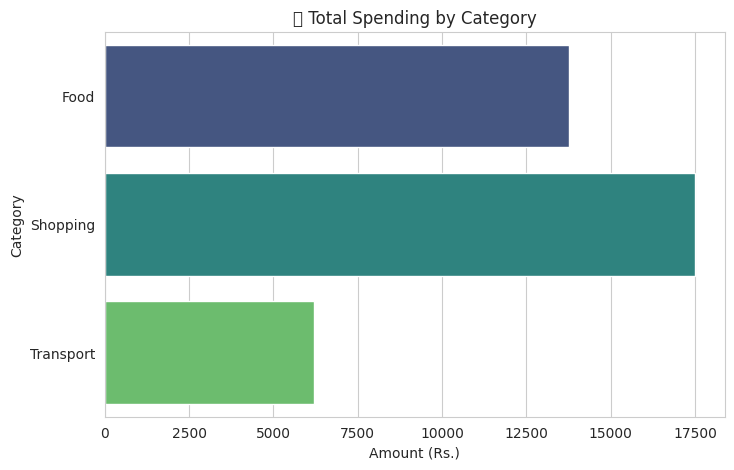

In [35]:
# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=category_data.values, y=category_data.index, palette="viridis")
plt.title("📊 Total Spending by Category")
plt.xlabel("Amount (Rs.)")
plt.ylabel("Category")
plt.show()
